In [182]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

## Dive 

    Create a synthetic dataset to experiment with linear regression

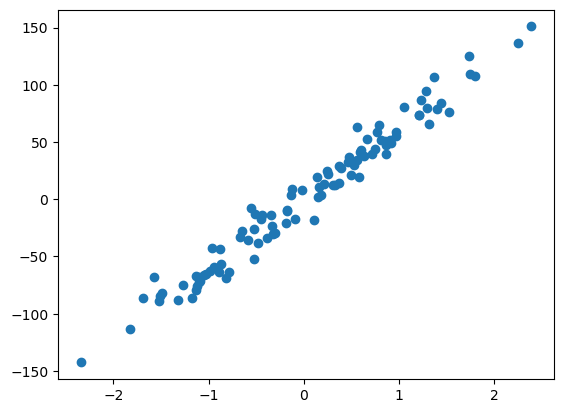

In [183]:
#générer un dataset avec make_regression
x , y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x,y)

divide this dataset in a training set and un testing set (see sklearn train_test_split)

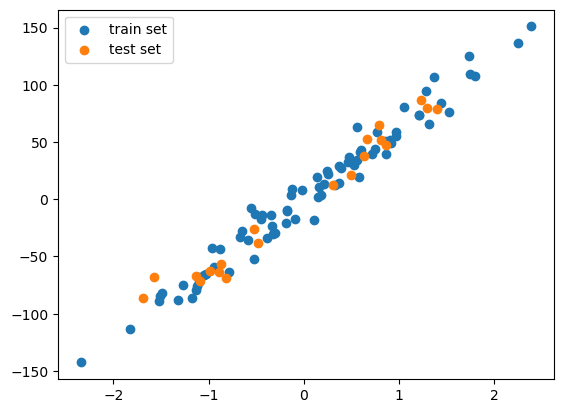

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
plt.scatter(x_train, y_train, label = "train set")
plt.scatter(x_test, y_test, label = "test set")
plt.legend()

score 0.9701742764458331


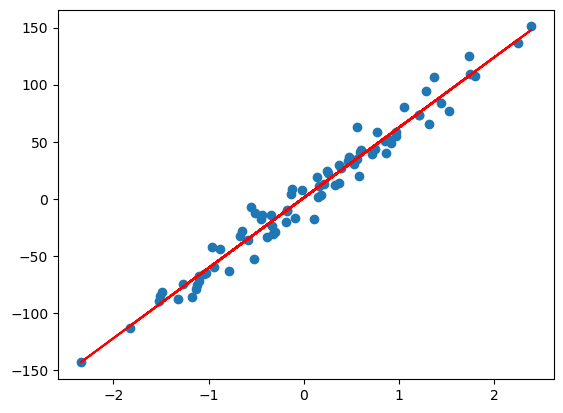

In [185]:
# model
model = LinearRegression()
model.fit(x_train, y_train)
print('score', model.score(x_train, y_train))
plt.scatter(x_train, y_train)
y2 = model.predict(x_train)
plt.plot (x_train, y2, 'r')

score 0.9660087135200764


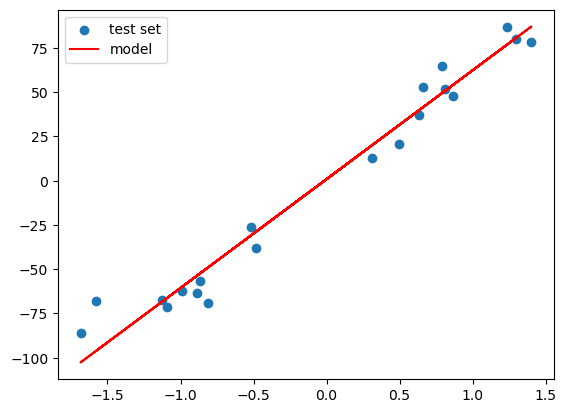

In [186]:
prediction_test = model.predict(x_test)
plt.scatter(x_test, y_test, label = "test set")
plt.plot(x_test, prediction_test, 'r', label = "model")
plt.legend()
print('score', model.score(x_test, y_test))

(-5.0, 5.0)

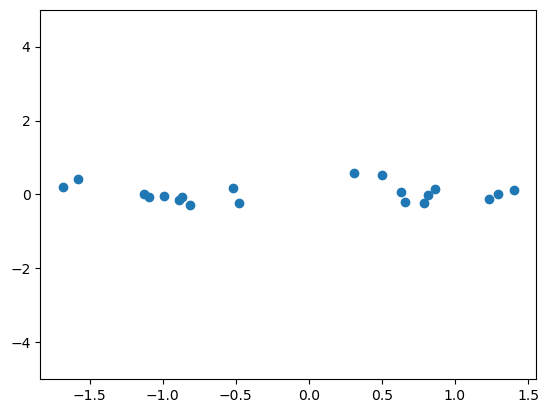

In [187]:
#écart relatif (ça c'est pour moi car je suis psycho_rigide)
erel_residu = (prediction_test - y_test)/(y_test)
plt.scatter(x_test, erel_residu)
plt.ylim(-5,5)


In [188]:
#RMSE 
from sklearn import metrics
#MSE from sklearn , args : (y_true, y_predicted)
MSE = metrics.mean_squared_error(y_test, prediction_test)
RMSE = np.sqrt(MSE)

RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, model.predict(x_train)))
print(f'{RMSE_train=}, {RMSE=}')


RMSE_train=10.587198653489073, RMSE=11.162774757251457


## EXPLORE
Add some distorsion to your data to make the problem harder

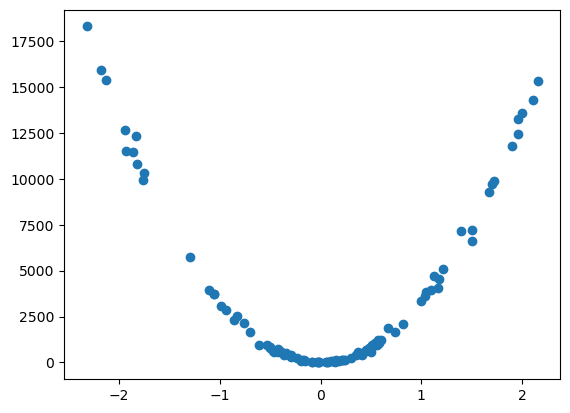

In [189]:
x2 , y2 = make_regression(n_samples=100, n_features=1, noise=2)
y_2 = y2**2

plt.scatter(x2, y_2)

score R² 0.010971789597170822
RMSE 4567.197631057507


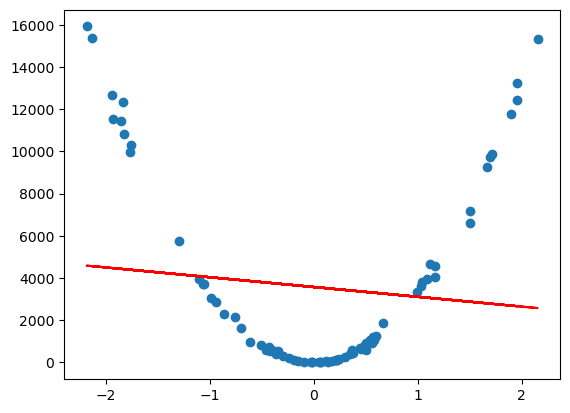

In [190]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y_2, test_size=0.2)
model2 = LinearRegression()
model2.fit(x2_train, y2_train)
print('score R²', model2.score(x2_train, y2_train))
plt.scatter(x2_train, y2_train)
res_train = model2.predict(x2_train)
print('RMSE', np.sqrt(metrics.mean_squared_error(y2_train, res_train)))
plt.plot (x2_train, res_train, 'r')

score R² -0.039159384932556884
RMSE 5485.4985424248825


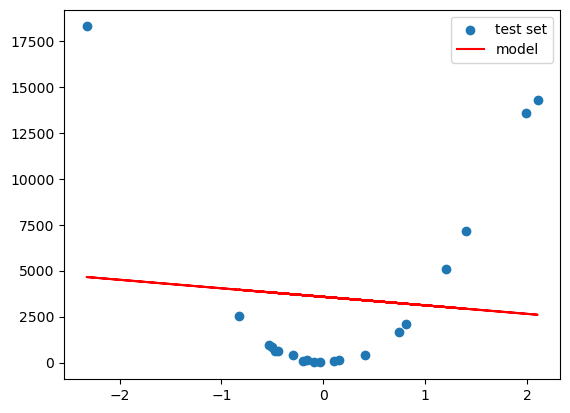

In [191]:
prediction_test2 = model2.predict(x2_test)
plt.scatter(x2_test, y2_test, label = "test set")
plt.plot(x2_test, prediction_test2, 'r', label = "model")
plt.legend()
print('score R²', model2.score(x2_test, y2_test))
print('RMSE', np.sqrt(metrics.mean_squared_error(y2_test, prediction_test2)))


score R² 0.997226559159913
RMSE 241.85491539405078


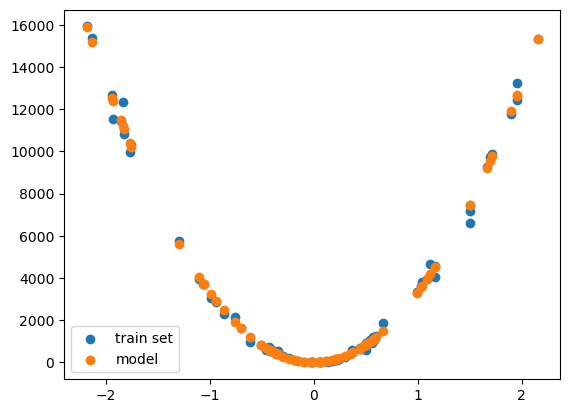

In [192]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# x2_test= x2_test[:, np.newaxis]
# x2_train= x2_train[:, np.newaxis]
# y2_test= y2_test[:, np.newaxis]
# y2_train= y2_train[:, np.newaxis]

model3= make_pipeline(PolynomialFeatures(3),Ridge(alpha=1e-3))
model3.fit(x2_train, y2_train)
print('score R²', model3.score(x2_train, y2_train))
plt.scatter(x2_train, y2_train, label = 'train set')
res_train3 = model3.predict(x2_train)
print('RMSE', np.sqrt(metrics.mean_squared_error(y2_train, res_train3)))
plt.scatter(x2_train, res_train3, label = 'model')
plt.legend()

score R² 0.9980614276229236
RMSE 236.92780554818913


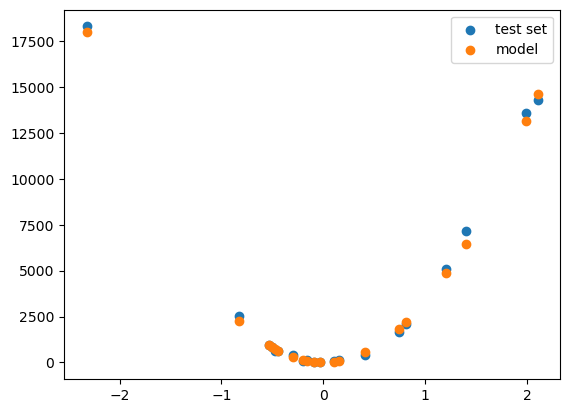

In [193]:
prediction_test3 = model3.predict(x2_test)
plt.scatter(x2_test, y2_test, label = "test set")
plt.scatter(x2_test, prediction_test3, label = "model")
plt.legend()
print('score R²', model3.score(x2_test, y2_test))
print('RMSE', np.sqrt(metrics.mean_squared_error(y2_test, prediction_test3)))